**<h1><center>CS 464</center></h1>**
**<h1><center>Introduction to Machine Learning</center></h1>**
**<h1><center>Spring 2022</center></h1>**
**<h1><center>Homework 3</center></h1>**
<h4><center>Due: DEC 23, 2022 23:59 (GMT+3)</center></h4>

In this third homework assignment, you are asked to develop a system that can be used to supply additional information to weather forecasts. For this task, you are provided a dataset that consists of weather images that belong to four different weather conditions: [cloudy, rain, shiny, sunrise]. Your model will classify images considering these class labels. 

For this assignment, **using PyTorch is mandatory.**

**Tip:** You may experience latencies in file I/O if you are using Google Colab. In this regard, we recommend you upload your data to Google Drive as a zip file and unzip the folder contents in your drive. If you would like to upload the data files separately, it may take significant time.

You will submit a single ipynb file as the homework submission. If you want to provide further explanation about your work, you can add Markdown cells to do so. [Here](https://www.markdownguide.org/), you can find a guide for Markdown syntax. Upload your homework with the following filename convention: \<BilkentID\>\_\<Name\>\_\<Surname\>.ipynb

**Contact:**
- [Yusuf Dalva](mailto:yusuf.dalva@bilkent.edu.tr)
- [Ahmet Burak Yıldırım](mailto:a.yildirim@bilkent.edu.tr)

**Dataset**<br>
You can find the dataset [here](https://www.kaggle.com/datasets/pratik2901/multiclass-weather-dataset). 


# **ReadMe** ❗❗
🛑 In the code cells before Q1 I uploaded dataset to my drive and unzip it to drive.

🛑 For Load Data part after writing the CustomDataset class I wrote another code cell for getting the data from datasets and divided them according to the training,validation and test sets ratios. After that I shuffled the sets there and I did not need to make shuffle when creating DataLoader obejcts. I also initialized the transform in that cell which will be applied in getItem function of CustomDateset objects.

🛑 For each sections training parts ( FCN,CNN and TL ) I wrote 2 code cells. In the first code cells, I tried to find best hyperparameters and in the second cell after I got the optimal hyperparameters I trained the model according to those parameters. I selected my criterion as **accuracy** rate. I could have saved models in just first code cell and use it for testing but I preferred training the model again with optimal parameters as in the homework it is not wanted from us to submit model.pth files. However, there is a drawback of that approach that I did not expect to encounter. After I trained with optimal hyperparameters I did not get exactly same rates( in same sets) with when I trained to select hyperparameters even though I used same hyperparameters. I think the reason behind that is randomity of the initial models' parameters when I initialize models. This causes models not to be exactly same even though they are trained with same procedure and same hyperparameters.

🛑 For FCN and CNN I tried 6 different situations for 2 hyperparameters which are learning size and train_batch size. For learning rate I tried ( 5e-2,5e-3,5e-4) and for batch sizes ( 32,64,128) and set epoch number to 100. I did not change weight_decay and momentum so they were their default values which is 0. I set epoch size to 100 and printed accuracy and loss values in every 5 epochs in both training and validation sets. Training the FCN model and selecting hyperparameters approximately took 4 hours and training CNN model and selecting hyperparameters approximately took 8 hours. For transfer learning, altough I just replaced the final layer it was taking much more time according to FCN and CNN models and in first epochs accuracy rate was already very high so I decided to decrease epoch number to 30 and try in 4 different situations (32,64) for batch size and (5e-2,5e-3) for learning rates to decide optimal hyperparameters. 

🛑 In training parts, I preffered to calculate accuracy and loss values of training set while I make training in the epoches to make things faster. After every epoch finishes I calculated accuracy and loss values of the validation set. So it is the reason behind why training sets' accuracy starts lower and loss starts higher. Printed losses are loss per sample.











In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
files.upload()

In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d pratik2901/multiclass-weather-dataset


 81% 74.0M/91.4M [00:00<00:00, 154MB/s] 
100% 91.4M/91.4M [00:00<00:00, 158MB/s]


In [ ]:
! unzip /content/multiclass-weather-dataset.zip

# **Q1** [12 points]
This part consists of 4 questions which you are expected to answer. Please fill in the following cell in Markdown format. Each question is worth 2 points.

a) Do we need to output the actual probability values when performing classification with the softmax layer? If not, how do these numbers represent the likelihood of classes? Also, does the output values should be in a specific range for us to make a classification? <br>

b) From the perspective of model complexity, how you can identify when a model underfits or overfits? Which plots are informative for detecting this behavior? <br>

c) In neural networks, how does the ReLU function help us to generalize to conplex feature spaces? Why we are not using linear layers only? <br>

d) Assume that you are going to pass the feature matrix with dimensions 64x64x5 (Height x Width x Channel size) through a convolutional layer. If our convolutional layer has a kernel size of 3x3 and the number of filters is 6, how many learnable parameters are present? <br>

a) Outputs of softmax layer is like a probability distribution over the possible classes. Output values represent the likelihood of each class, with higher values indicating a more possibility. It is not necessary to output the actual probability values in order to use the softmax layer for classification. Instead, we can choose the class with the highest value to classify. Outputs will be always in the range of 0 to 1. And sum of outputs are 1. If we say there are n classes then, output value at least should bigger or equal to than 1/n to be biggest output value. But being bigger than 1/n is not enough to be biggest output value.







b) Overfitting occurs when a model is too complex or has too many parameters compared to the amount of data it is being trained on. In this case, the model will perform well on the training data, but it will not perform well on new data. So model will not be able to make accurate predictions on data it has not seen before. Underfitting happens when a model is not complex enough to fit with the underlying patterns in the data. In underfitting model will not perform well on the training data, and it will not be able to make accurate classifications on new data. Accuracy plots can be useful for detecting overfitting or underfitting. If accuracy is high in training and low in test set then it may be overfitting. If accuracy is low in training and low in test set then it may be underfitting.


c) Relu function is not linear so it can learn more complex relationships between input and output data. With using the ReLU function, neural networks can learn more complex patterns from the datasets than linear models can learn. Also Relu function can improve the training speed of when deling with complex models.

d) So we have 5 inputs as input channels, we have filter size *filter number = 6.3.3 = 54 outputs. If we multiply 64 outputs with our 5 inputs and we have 54.5 = 270 learnable parameters. If we add the biases which is the filter number we get 270+6 = 276 is total learnable parameters.

# **Q2** [88 points]

## Necessary Imports
In the cell below, we import some utilities that you can make use of in this assignment. Note that you need to use PyTorch in this assignment. To report certain metrics (like precision, recall, accuracy) you may use utilities from *scikit-learn* library. You can edit these imports considering your implementation as long as you use PyTorch.

## Setup

In [3]:
import os 
import time
import random

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models
from torch.utils.data import Dataset, DataLoader

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score

You can test whether hardware acceleration with GPU is enabled in the cell below. In addition, if you have GPU access, you can check the amount of available GPU memory.

In [ ]:
# setting device as GPU if available, else CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

# CUDA device information
if device.type == 'cuda':
    print('GPU Name:', torch.cuda.get_device_name(0))
    print('Memory Stats:')
    print('  - Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('  - Cached:   ', round(torch.cuda.memory_reserved(0)/1024**3,1), 'GB')
    print('  - Total:    ', round(torch.cuda.get_device_properties(0).total_memory/1024**3,1), 'GB')

Using device: cpu


**DO NOT CHANGE**<br>
To evaluate your implementation fairly, we set seed values for random sampling methods in PyTorch, Numpy, and Python random library. These seeds are set to evaluate your models successfully, so do not change these values.

In [ ]:
# for reproducable results
torch.manual_seed(464)
torch.cuda.manual_seed(464)
np.random.seed(464)
random.seed(464)
if device.type == 'cuda':
    torch.backends.cudnn.deterministic=True

## Load Data [6 points]
In this assignment, you will use a custom dataset, which you need a wrapper class to access its data. For this purpose, implement a custom dataset class to organize data with the specifications you need. This class will load batches of data using a PyTorch DataLoader later. The class signature of CustomDataset class is provided to you in the cell below, where you can implement your custom dataset.

**IMPORTANT:** As you may have difficulties while fitting all images to your RAM, you need to read the images while getting that item (each item is an image here). We encourage you to read the data files in the "__getitem__" function to avoid encountering any issues related to fitting the data to memory. This way, you do not need to hold the dataset in a single variable, which would be memory intensive.

In [ ]:
import os

import glob
from torchvision import datasets, transforms, models
class CustomDataset(Dataset):
    def __init__(self, data, labels, transform=None):
        self.data = data
        self.labels = labels
        self.transform = transform
        
    
    def __len__(self):
        return len( self.data)
    
    def __getitem__(self, idx):
        image_path = self.data[idx]
        label = self.labels[idx]

        image = Image.open(image_path)
        image = image.convert('RGB')
        if self.transform:
            image = self.transform(image)

        return image, label
        



In [ ]:
classes = ("Cloudy","Rain","Shine","Sunrise")
datapath = "/content/drive/MyDrive/HW3/Multi-class Weather Dataset"
file_paths = []
train_set = []
val_set =  []
test_set = []
sum = 0
for folder_name in classes:
  file_paths = []
  folder_path = os.path.join(datapath,folder_name)
  filenames = os.listdir(folder_path)

        # construct the full paths to the files
  folder_file_paths = [os.path.join(folder_path, filename) for filename in filenames]
  file_paths.extend(folder_file_paths)


  num_samples = len(filenames)
  train_size = int(0.7 * num_samples)
  val_size = int(0.1 * num_samples)
  test_size = num_samples - train_size - val_size
  train_setS, val_setS, test_setS = torch.utils.data.random_split(file_paths, [train_size, val_size, test_size])
  train_set.extend(train_setS)
  val_set.extend(val_setS)
  test_set.extend(test_setS)


random.shuffle(train_set)
random.shuffle(test_set)
random.shuffle(val_set)

train_labels = np.zeros(len(train_set))
val_labels = np.zeros(len(val_set))
test_labels = np.zeros(len(test_set))

for i in range(0,len(train_labels)):
  if train_set[i][len(datapath)+1:len(datapath)+7] == classes[0]:
      train_labels[i] = 0
  elif train_set[i][len(datapath)+1:len(datapath)+5] == classes[1]:
      train_labels[i] = 1
  elif train_set[i][len(datapath)+1:len(datapath)+6] == classes[2]:
      train_labels[i] = 2
  elif train_set[i][len(datapath)+1:len(datapath)+8] == classes[3]:
      train_labels[i] = 3
  else:
      train_labels[i] = -1

for i in range(0,len(val_labels)):
  if val_set[i][len(datapath)+1:len(datapath)+7] == classes[0]:
      val_labels[i] = 0
  elif val_set[i][len(datapath)+1:len(datapath)+5] == classes[1]:
      val_labels[i] = 1
  elif val_set[i][len(datapath)+1:len(datapath)+6] == classes[2]:
      val_labels[i] = 2
  elif val_set[i][len(datapath)+1:len(datapath)+8] == classes[3]:
      val_labels[i] = 3
  else:
      val_labels[i] = -1


for i in range(0,len(test_labels)):
  if test_set[i][len(datapath)+1:len(datapath)+7] == classes[0]:
      test_labels[i] = 0
  elif test_set[i][len(datapath)+1:len(datapath)+5] == classes[1]:
      test_labels[i] = 1
  elif test_set[i][len(datapath)+1:len(datapath)+6] == classes[2]:
      test_labels[i] = 2
  elif test_set[i][len(datapath)+1:len(datapath)+8] == classes[3]:
      test_labels[i] = 3
  else:
      test_labels[i] = -1    


transformation = transforms.Compose([transforms.Resize((224,224)),
                                     transforms.RandomHorizontalFlip(p=1),
                                      transforms.ToTensor(),
                                      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])


You can implement an additional function to read and construct custom dataset objects for training, validation, and test sets. While constructing the dataset, consider the following issues:
- Dataset contains images that end with prefixes *.jpg* and *.jpeg*.
- If you use PIL to read images, you should convert them to "RGB" format to operate on three color channels.
- Resize the dataset images to 224x224. You are going to design models that take images with tensor shape 224x224x3.
- If you wish, you can change the ordering of the color channels with np.moveaxis function

Lastly, the train-validation-test split for the dataset provided to you is 70-10-20 in terms of percentages. While constructing the dataset, remember that shuffling is a necessary step (to get randomly distributed classes across batches).

You can design your dataset getter method compatible with the line provided below, where train_dataset, val_dataset, and test_dataset are all instances of CustomDataset.

In [ ]:


train_dataset = CustomDataset(data = train_set, labels = train_labels, transform = transformation)
val_dataset = CustomDataset(data = val_set, labels = val_labels, transform = transformation)
test_dataset = CustomDataset(data = test_set, labels = test_labels, transform = transformation)
#train_dataset, val_dataset, test_dataset = None, None, None

## Models [16 points]
In this assignment, you will implement one CNN (Convolutional Neural Network) model and one FCN (Fully-Connected Network) model, where the class signatures are provided below.

### Convolutional Neural Network (CNN) Model [8 points]
As the first model, you will implement a convolutional model. Your model will include 3 CONV + POOL blocks, which denotes one Convolutional layer followed by a Max Pooling Layer. The channel sizes for convolutional blocks are [16, 32, 64], respectively. For all convolutional layers, take kernel size as 3, stride as one, and apply padding such that convolutions do not change the shape on width and height dimensions. 
<br><br>
Following the convolutional part, you will perform image classification for the dataset provided to you. You can use ReLU activation as the non-linearity in your model (except the classification layer).

In [4]:
class ConvNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, 3,1,1)
        self.conv2 = nn.Conv2d(16, 32, 3,1,1)
        self.conv3 = nn.Conv2d(32, 64, 3,1,1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(50176, 1024) 
        self.fc2 = nn.Linear(1024, 32)
        self.fc3 = nn.Linear(32, 4)
        
     
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

### Fully Connected Network (FCN) Model [8 points]
The second model you will try is a Fully Connected Network composed of Linear layers and non-linear activation functions connected to each other. For this part, the number of features for your linear layers is [1024, 512, 256]. Again, you can use ReLU as your non-linear activation function in your model (except the classification layer).

In [ ]:
class FCNet(nn.Module):
    def __init__(self, input_size, output_size):
      super().__init__()
      self.fc1 = nn.Linear(input_size, 1024)
      self.fc2 = nn.Linear(1024,512)
      self.fc3 = nn.Linear(512,256)
      self.fc4 = nn.Linear(256, output_size)
     
    def forward(self, x):
      x = x.reshape(-1,150528)
      x = F.relu(self.fc1(x))
      x = F.relu(self.fc2(x))
      x = F.relu(self.fc3(x))
      x = self.fc4(x)
      return x

## Training and Evaluation of FCN [22 points]

Now that you implemented the model definition of CNN and FCN, you will train these models with the hyperparameters you chose. The hyperparameters that you may change are listed in the cell below. Using the FCN model defined, train a classifier that predicts weather condition classes specified by the dataset. For the optimizer, use [SGD](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html) optimizer provided by PyTorch. You should try out different hyper-parameters like learning rates, epochs, momentum, and weight decay. For [momentum](https://machinelearningmastery.com/gradient-descent-with-momentum-from-scratch/) and [weight decay](https://paperswithcode.com/method/weight-decay), you can read about these concepts if you are interested.

While training your model, save your best model over different epochs. You must select an appropriate metric to define the best model at a time step. You can implement the training procedure in the cell below. If you want to explain the reasoning behind your metric selection, you can add a markdown cell and provide your comments.

🛑 I tried 6 different situations and at the end selected my hyperparameters according to the accuracy at the end of 100th epochs. So my criterion was getting the hyperparameters with the best validation accuracy at the end of trainings (100 epochs). It came out optimal learn rate is 0.05 and batch size is 64 for FCN model.


### Training [12 points]

In [ ]:
#HINT: note that your training time should not take many days.



#TODO:
#Pick your hyper parameters
max_epoch = 100
train_batch = 64
test_batch = 64
learning_rate = (5e-2,5e-3,5e-4)
momentum = 0.5
weight_decay = 5e-04

optimalLearn = -1
maxAcc = -1

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=train_batch,
                                          shuffle=False)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=test_batch,
                                         shuffle=False)

val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=train_batch,
                                         shuffle=False)

input_size = 3*224*224
output_size = 4

criterion = nn.CrossEntropyLoss()

for lrate in learning_rate:
  print("LR",lrate)
  model = FCNet(input_size,output_size)
  model = model.to(device)
  optimizer = torch.optim.SGD(model.parameters(), lr = lrate)
  for i in range (0,max_epoch):
    correct = 0
    total = 0
    loss_t = 0
    for j,(images, labels) in enumerate(train_loader):

      images = images.to(device)
      labels = labels.to(device)

      outputs = model(images)
      loss = criterion(outputs, labels.long())

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      loss_t = loss_t + criterion(outputs, labels.long())
      _, predicted = torch.max(outputs.data, 1)

      total += labels.size(0)

      if torch.cuda.is_available():
          correct += (predicted.cpu() == labels.cpu()).sum()
      else:
          correct += (predicted == labels).sum()
        
      accuracy = 100 * correct.item() / total
      
      if j == len(train_loader) - 1:
        loss_t = 100 * loss_t / total
        if (i+1) % 5 == 0:
          print('Epoch:(Training) {}. Loss: {}. Accuracy: {}'.format(i+1, loss_t, accuracy))

        correctV = 0
        totalV = 0
        loss_v =0
        for images, labels in val_loader:

            #images = images.view(-1, 3,224,224).to(device)
            images = images.to(device)

            outputs = model(images)

            loss_v = loss_v + criterion(outputs, labels.long())

            _, predicted = torch.max(outputs.data, 1)

                # Total number of labels
            totalV += labels.size(0)

            if torch.cuda.is_available():
                correctV += (predicted.cpu() == labels.cpu()).sum()
            else:
                correctV += (predicted == labels).sum()

        accuracyV = 100 * correctV.item() / totalV
        loss_v = 100 * loss_v / totalV
        if (i+1) % 5 == 0:
          print('Epoch:(Validation)  {}. Loss: {}. Accuracy: {}'.format(i+1, loss_v, accuracyV))
        
        if (i+1) == max_epoch:
          if ( accuracyV > maxAcc):
            maxAcc = accuracyV
            optimalLearn = lrate

print("optimal learning parameter",optimalLearn)


optimalBatch = -1
maxAcc = -1


batchSizes = ( 32,64,128)
criterion = nn.CrossEntropyLoss()


for batchS in batchSizes:
  print("Batch Size",batchS)
  
  model = FCNet(input_size,output_size)
  model = model.to(device)
  optimizer = torch.optim.SGD(model.parameters(), lr = optimalLearn)

  train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batchS,
                                          shuffle=False)

  val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batchS,
                                         shuffle=False)
  for i in range (0,max_epoch):
    correct = 0
    total = 0
    loss_t = 0
    for j,(images, labels) in enumerate(train_loader):

    
      images = images.to(device)
      labels = labels.to(device)

      outputs = model(images)
      loss = criterion(outputs, labels.long())

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      loss_t = loss_t + criterion(outputs, labels.long())
      _, predicted = torch.max(outputs.data, 1)

      total += labels.size(0)

      if torch.cuda.is_available():
          correct += (predicted.cpu() == labels.cpu()).sum()
      else:
          correct += (predicted == labels).sum()
             
      if j == len(train_loader) - 1:
        accuracy = 100 * correct.item() / total
        loss_t = 100 * loss_t / total
        if (i+1) % 5 == 0:
          print('Epoch:(Training) {}. Loss: {}. Accuracy: {}'.format(i+1, loss_t, accuracy))

        correctV = 0
        totalV = 0
        loss_v =0
        for images, labels in val_loader:

            images = images.to(device)

            outputs = model(images)

            loss_v = loss_v + criterion(outputs, labels.long())

            _, predicted = torch.max(outputs.data, 1)

            totalV += labels.size(0)

            if torch.cuda.is_available():
                correctV += (predicted.cpu() == labels.cpu()).sum()
            else:
                correctV += (predicted == labels).sum()

        accuracyV = 100 * correctV.item() / totalV
        loss_v = 100 * loss_v / totalV
            # Print Loss
        if (i+1) % 5 == 0:
          print('Epoch:(Validation) {}. Loss: {}. Accuracy: {}'.format(i+1, loss_v, accuracyV))
        if (i+1) == max_epoch:
          if ( accuracyV > maxAcc):
            maxAcc = accuracyV
            optimalBatch = batchS

print("optimal batch size ",optimalBatch)

LR 0.05
Epoch:(Training) 5. Loss: 0.6259466409683228. Accuracy: 86.00508905852418
Epoch:(Validation)  5. Loss: 0.6770697832107544. Accuracy: 85.58558558558559
Epoch:(Training) 10. Loss: 0.39710038900375366. Accuracy: 92.36641221374046
Epoch:(Validation)  10. Loss: 0.7087348699569702. Accuracy: 85.58558558558559
Epoch:(Training) 15. Loss: 0.10233576595783234. Accuracy: 98.47328244274809
Epoch:(Validation)  15. Loss: 0.6678571105003357. Accuracy: 84.68468468468468
Epoch:(Training) 20. Loss: 0.04435748979449272. Accuracy: 99.36386768447836
Epoch:(Validation)  20. Loss: 0.7071231007575989. Accuracy: 85.58558558558559
Epoch:(Training) 25. Loss: 0.014137188903987408. Accuracy: 100.0
Epoch:(Validation)  25. Loss: 0.8078597187995911. Accuracy: 85.58558558558559
Epoch:(Training) 30. Loss: 0.005547956097871065. Accuracy: 100.0
Epoch:(Validation)  30. Loss: 0.7928271889686584. Accuracy: 84.68468468468468
Epoch:(Training) 35. Loss: 0.003494555363431573. Accuracy: 100.0
Epoch:(Validation)  35. Loss

In [ ]:
##Drawing plots with the best hyperparameters on training and validation sets and training the model with fcn last time
accuracy_list_val = []
accuracy_list_train = []

loss_val =[]
loss_train = []
epoch_list = []

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=optimalBatch,
                                          shuffle=False)

val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=optimalBatch,
                                         shuffle=False)

model = FCNet(input_size,output_size)
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = optimalLearn)

for i in range (0,max_epoch):
    correct = 0
    total = 0
    loss_t = 0
    for j,(images, labels) in enumerate(train_loader):

    
      images = images.to(device)
      labels = labels.to(device)

      outputs = model(images)
      loss = criterion(outputs, labels.long())

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      loss_t = loss_t + criterion(outputs, labels.long())
      _, predicted = torch.max(outputs.data, 1)

      total += labels.size(0)

      if torch.cuda.is_available():
          correct += (predicted.cpu() == labels.cpu()).sum()
      else:
          correct += (predicted == labels).sum()
        
      
      if j == len(train_loader) - 1:
        accuracy = 100 * correct.item() / total
        loss_t = 100 * loss_t / total
        accuracy_list_train.append(correct*100/total)
        loss_train.append(loss_t.item())
        if (i+1) % 5 == 0:
          print('Epoch: Training {}. Loss: {}. Accuracy: {}'.format(i+1, loss_t, accuracy))

        correctV = 0
        totalV = 0
        loss_v =0
        for images, labels in val_loader:

            images = images.to(device)

            outputs = model(images)

            loss_v = loss_v + criterion(outputs, labels.long())

            _, predicted = torch.max(outputs.data, 1)

            totalV += labels.size(0)

            if torch.cuda.is_available():
                correctV += (predicted.cpu() == labels.cpu()).sum()
            else:
                correctV += (predicted == labels).sum()

        accuracyV = 100 * correctV.item() / totalV
        loss_v = 100 * loss_v / totalV
        if (i+1) % 5 == 0:
          print('Epoch: Validation {}. Loss: {}. Accuracy: {}'.format(i+1, loss_v, accuracyV))
        accuracy_list_val.append(correctV*100/totalV)
        loss_val.append(loss_v.item())
        epoch_list.append(i+1)

Epoch: Training 5. Loss: 0.6106055378913879. Accuracy: 86.76844783715013
Epoch: Validation 5. Loss: 0.7350512742996216. Accuracy: 85.58558558558559
Epoch: Training 10. Loss: 0.24849355220794678. Accuracy: 95.67430025445293
Epoch: Validation 10. Loss: 0.7743385434150696. Accuracy: 82.88288288288288
Epoch: Training 15. Loss: 0.0875936970114708. Accuracy: 98.47328244274809
Epoch: Validation 15. Loss: 0.6794873476028442. Accuracy: 82.88288288288288
Epoch: Training 20. Loss: 0.02621297910809517. Accuracy: 100.0
Epoch: Validation 20. Loss: 0.7726959586143494. Accuracy: 86.48648648648648
Epoch: Training 25. Loss: 0.014132745563983917. Accuracy: 100.0
Epoch: Validation 25. Loss: 0.8004629015922546. Accuracy: 84.68468468468468
Epoch: Training 30. Loss: 0.005451465491205454. Accuracy: 100.0
Epoch: Validation 30. Loss: 0.7824757695198059. Accuracy: 84.68468468468468
Epoch: Training 35. Loss: 0.003438466927036643. Accuracy: 100.0
Epoch: Validation 35. Loss: 0.7854820489883423. Accuracy: 84.6846846

### Learning Process Analysis [5 points]
Following the training step, you will now provide accuracy and loss plots over all epochs. For this, provide two plots:
- In the first plot, you will provide the value of the accuracy metric over epochs. Your plot should include two curves, one for the training set and the other for the validation set.
- For the second plot, provide the curve for loss values over epochs. Again your plot should include two curves, where one indicates loss on the training set and the second indicates loss for the validation set.

Batch_size: 64 , Learning rate: 0.05
Validation and training accuracies with optimal hyperparameters


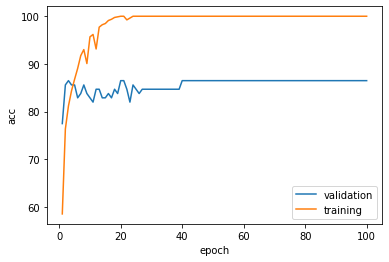

In [ ]:
# TODO: Implement your plots here, you can use matplotlib library to do so.
print("Batch_size:",optimalBatch, ", Learning rate:",optimalLearn)
print("Validation and training accuracies with optimal hyperparameters")

plt.xlabel("epoch")
plt.ylabel("acc")

plt.plot(epoch_list,accuracy_list_val,label="validation")

plt.plot(epoch_list,accuracy_list_train, label = "training")

plt.legend()

plt.show()

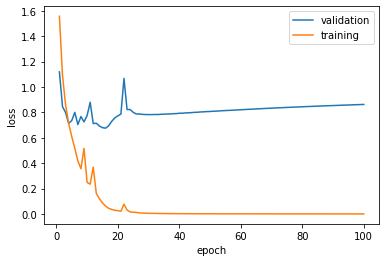

In [ ]:
plt.xlabel("epoch")
plt.ylabel("loss")

plt.plot(epoch_list,loss_val,label="validation")

plt.plot(epoch_list,loss_train, label = "training")

plt.legend()

plt.show()

### Test [5 points]
As the final step of your analysis, you will test your model using some metrics. For the best model you obtained during training, evaluate your model on the test set. Then, report the confusion matrix. Finally, report accuracy, precision, recall, and $F_1$ score using your model. Report all these metrics using the macro form (macro precision, macro recall, etc.). You can implement these metrics in the cell below. 

Accuracy: 0.860
Precision: 0.849
Recall: 0.848
F1 Score: 0.848


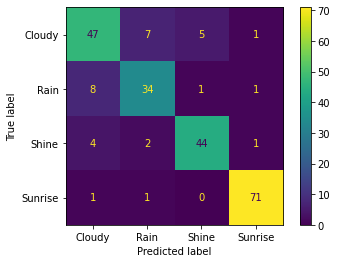

In [ ]:
# TODO: Implement your evaluation script here, provide the confusion matrix and the requested metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_true = []
y_pred = []
for images, labels in test_loader:

    images = images.to(device)
    outputs = model(images)
    y_true.extend(labels)
    _, predicted = torch.max(outputs.data, 1)
    y_pred.extend(predicted)



accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred,average='macro')
recall = recall_score(y_true, y_pred,average='macro')
f1 = f1_score(y_true, y_pred,average='macro')

print(f'Accuracy: {accuracy:.3f}')
print(f'Precision: {precision:.3f}')
print(f'Recall: {recall:.3f}')
print(f'F1 Score: {f1:.3f}')

conf_m =confusion_matrix(y_true, y_pred)

conf_graph = ConfusionMatrixDisplay(confusion_matrix= conf_m, display_labels=classes)

conf_graph.plot()
plt.show()

## Training and evaluation of CNN [22 points]
Similar to the FCN model, you will now train the CNN model that you defined before. Again you are free to try out different hyperparameters. This model also will classify weather images with the four classes provided by the dataset. As the optimizer, again, use the SGD implementation provided by PyTorch. You can implement the training loop in the following cell. 

Similar to the training procedure, you need to save the best model you obtain during training. Select an appropriate criterion (metric) to save the best model. If you wish, you can add a markdown cell to explain your reasoning.

🛑 I tried 6 different situations and at the end selected my hyperparameters according to the accuracy at the end of 100th epochs. So my criterion was getting the hyperparameters with the best validation accuracy at the end of trainings (100 epochs). It came out optimal learn rate is 0.005 and batch size is 32 for CNN model.


### Training [12 points]

In [ ]:
#HINT: note that your training time should not take many days.



#TODO:
#Pick your hyper parameters
max_epoch = 100 #100
train_batch = 64
test_batch = 64
learning_rate = (5e-2,5e-3,5e-4)
momentum = 0.5
weight_decay = 5e-04

optimalLearn = -1
maxAcc = -1

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=train_batch,
                                          shuffle=False)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=test_batch,
                                         shuffle=False)

val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=train_batch,
                                         shuffle=False)

input_size = 3*224*224
output_size = 4

# TODO: training loop + eval

criterion = nn.CrossEntropyLoss()

for lrate in learning_rate:
  print("LR",lrate)
  modelCnn = ConvNet().to(device)
  optimizer = torch.optim.SGD(modelCnn.parameters(), lr = lrate)
  for i in range (0,max_epoch):
    correct = 0
    total = 0
    loss_t = 0
    for j,(images, labels) in enumerate(train_loader):

      images = images.to(device)
      labels = labels.to(device)

      outputs = modelCnn(images)
      loss = criterion(outputs, labels.long())

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      loss_t = loss_t + criterion(outputs, labels.long())
      _, predicted = torch.max(outputs.data, 1)

      total += labels.size(0)

      if torch.cuda.is_available():
          correct += (predicted.cpu() == labels.cpu()).sum()
      else:
          correct += (predicted == labels).sum()
        
      accuracy = 100 * correct.item() / total
      
      if j == len(train_loader) - 1:
        
        loss_t = 100 * loss_t / total
        if (i+1) % 5 == 0:
          print('Epoch:(Training) {}. Loss: {}. Accuracy: {}'.format(i+1, loss_t, accuracy))

        correctV = 0
        totalV = 0
        loss_v =0
        for images, labels in val_loader:

            images = images.to(device)

            outputs = modelCnn(images)

            loss_v = loss_v + criterion(outputs, labels.long())

            _, predicted = torch.max(outputs.data, 1)

            totalV += labels.size(0)

            if torch.cuda.is_available():
                correctV += (predicted.cpu() == labels.cpu()).sum()
            else:
                correctV += (predicted == labels).sum()

        accuracyV = 100 * correctV.item() / totalV
        loss_v = 100 * loss_v / totalV
        if (i+1) % 5 == 0:
          print('Epoch:(Validation)  {}. Loss: {}. Accuracy: {}'.format(i+1, loss_v, accuracyV))
        
        if (i+1) == max_epoch:
          if ( accuracyV > maxAcc):
            maxAcc = accuracyV
            optimalLearn = lrate

print("optimal learning parameter",optimalLearn)


optimalBatch = -1
maxAcc = -1


batchSizes = ( 32,64,128)
criterion = nn.CrossEntropyLoss()


for batchS in batchSizes:
  print("Batch Size",batchS)
  
  modelCnn = ConvNet().to(device)
  optimizer = torch.optim.SGD(modelCnn.parameters(), lr = optimalLearn)

  train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batchS,
                                          shuffle=False)

  val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batchS,
                                         shuffle=False)
  for i in range (0,max_epoch):
    correct = 0
    total = 0
    loss_t = 0
    for j,(images, labels) in enumerate(train_loader):

    
      images = images.to(device)
      labels = labels.to(device)

      outputs = modelCnn(images)
      loss = criterion(outputs, labels.long())

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      loss_t = loss_t + criterion(outputs, labels.long())
      _, predicted = torch.max(outputs.data, 1)

      total += labels.size(0)

      if torch.cuda.is_available():
          correct += (predicted.cpu() == labels.cpu()).sum()
      else:
          correct += (predicted == labels).sum()
        
      #accuracy = 100 * correct.item() / total
      #loss_t = 100 * loss_t / total
      if j == len(train_loader) - 1:
        
        accuracy = 100 * correct.item() / total
        loss_t = 100 * loss_t / total
        if (i+1) % 5 == 0:
          print('Epoch:(Training) {}. Loss: {}. Accuracy: {}'.format(i+1, loss_t, accuracy))

        correctV = 0
        totalV = 0
        loss_v =0
        for images, labels in val_loader:

            images = images.to(device)

            outputs = modelCnn(images)

            loss_v = loss_v + criterion(outputs, labels.long())

            _, predicted = torch.max(outputs.data, 1)

            totalV += labels.size(0)

            if torch.cuda.is_available():
                correctV += (predicted.cpu() == labels.cpu()).sum()
            else:
                correctV += (predicted == labels).sum()

        accuracyV = 100 * correctV.item() / totalV
        loss_v = 100 * loss_v / totalV
            # Print Loss
        if (i+1) % 5 == 0:
          print('Epoch:(Validation) {}. Loss: {}. Accuracy: {}'.format(i+1, loss_v, accuracyV))
        
        if (i+1) == max_epoch:
          if ( accuracyV > maxAcc):
            maxAcc = accuracyV
            optimalBatch = batchS

print("optimal batch size ",optimalBatch)

LR 0.05
Epoch:(Training) 5. Loss: 1.1657408475875854. Accuracy: 69.46564885496183
Epoch:(Validation)  5. Loss: 1.0711618661880493. Accuracy: 69.36936936936937
Epoch:(Training) 10. Loss: 0.7209393382072449. Accuracy: 82.95165394402035
Epoch:(Validation)  10. Loss: 0.6719589829444885. Accuracy: 87.38738738738739
Epoch:(Training) 15. Loss: 0.8666369915008545. Accuracy: 80.6615776081425
Epoch:(Validation)  15. Loss: 0.646879255771637. Accuracy: 86.48648648648648
Epoch:(Training) 20. Loss: 0.47910356521606445. Accuracy: 89.18575063613231
Epoch:(Validation)  20. Loss: 0.5517027974128723. Accuracy: 88.28828828828829
Epoch:(Training) 25. Loss: 0.540732741355896. Accuracy: 86.1323155216285
Epoch:(Validation)  25. Loss: 0.7636652588844299. Accuracy: 81.08108108108108
Epoch:(Training) 30. Loss: 0.36269527673721313. Accuracy: 90.45801526717557
Epoch:(Validation)  30. Loss: 0.7153275609016418. Accuracy: 84.68468468468468
Epoch:(Training) 35. Loss: 0.24626238644123077. Accuracy: 93.76590330788804
Ep

In [ ]:
##Drawing plots with the best hyperparameters on training and validation sets and training the model with fcn last time
accuracy_list_val_cnn = []
accuracy_list_train_cnn = []

loss_val_cnn =[]
loss_train_cnn = []
epoch_list_cnn = []

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=optimalBatch,
                                          shuffle=False)

val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=optimalBatch,
                                         shuffle=False)

modelCnn = ConvNet().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(modelCnn.parameters(), lr = optimalLearn)

for i in range (0,max_epoch):
    correct = 0
    total = 0
    loss_t = 0
    for j,(images, labels) in enumerate(train_loader):

    
      images = images.to(device)
      labels = labels.to(device)

      outputs = modelCnn(images)
      loss = criterion(outputs, labels.long())

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      loss_t = loss_t + criterion(outputs, labels.long())
      _, predicted = torch.max(outputs.data, 1)

      total += labels.size(0)

      if torch.cuda.is_available():
          correct += (predicted.cpu() == labels.cpu()).sum()
      else:
          correct += (predicted == labels).sum()
        
      
      if j == len(train_loader) - 1:
        accuracy = 100 * correct.item() / total
        loss_t = 100 * loss_t / total
        accuracy_list_train_cnn.append(correct*100/total)
        loss_train_cnn.append(loss_t.item())
        if (i+1) % 5 == 0:
          print('Epoch: Training {}. Loss: {}. Accuracy: {}'.format(i+1, loss_t, accuracy))

        correctV = 0
        totalV = 0
        loss_v =0
        for images, labels in val_loader:

            images = images.to(device)

            outputs = modelCnn(images)

            loss_v = loss_v + criterion(outputs, labels.long())

            _, predicted = torch.max(outputs.data, 1)

                # Total number of labels
            totalV += labels.size(0)

            if torch.cuda.is_available():
                correctV += (predicted.cpu() == labels.cpu()).sum()
            else:
                correctV += (predicted == labels).sum()

        accuracyV = 100 * correctV.item() / totalV
        loss_v = 100 * loss_v / totalV
        if (i+1) % 5 == 0:
          print('Epoch: Validation {}. Loss: {}. Accuracy: {}'.format(i+1, loss_v, accuracyV))
        accuracy_list_val_cnn.append(correctV*100/totalV)
        loss_val_cnn.append(loss_v.item())
        epoch_list_cnn.append(i+1)

Epoch: Training 5. Loss: 4.19624137878418. Accuracy: 35.49618320610687
Epoch: Validation 5. Loss: 4.624382972717285. Accuracy: 40.54054054054054
Epoch: Training 10. Loss: 2.956023693084717. Accuracy: 63.74045801526717
Epoch: Validation 10. Loss: 3.0665998458862305. Accuracy: 71.17117117117117
Epoch: Training 15. Loss: 2.2283546924591064. Accuracy: 74.42748091603053
Epoch: Validation 15. Loss: 2.2754921913146973. Accuracy: 74.77477477477477
Epoch: Training 20. Loss: 1.8772212266921997. Accuracy: 78.7531806615776
Epoch: Validation 20. Loss: 1.8927702903747559. Accuracy: 81.98198198198199
Epoch: Training 25. Loss: 1.621863603591919. Accuracy: 81.55216284987277
Epoch: Validation 25. Loss: 1.667288899421692. Accuracy: 82.88288288288288
Epoch: Training 30. Loss: 1.4365341663360596. Accuracy: 83.20610687022901
Epoch: Validation 30. Loss: 1.5301852226257324. Accuracy: 83.78378378378379
Epoch: Training 35. Loss: 1.2819850444793701. Accuracy: 84.2239185750636
Epoch: Validation 35. Loss: 1.443692

### Learning Process Analysis [3 points]
Repeating the same procedure you applied for the FCN model; you will provide two plots about how your training proceeds over epochs. Again, provide two plots: one summarizes the loss values, and the other summarizes the accuracy values. Note that each plot needs to include two curves, one for the validation set and the other for the training set.

Batch_size: 32 , Learning rate: 0.005
Validation and training accuracies with optimal hyperparameters


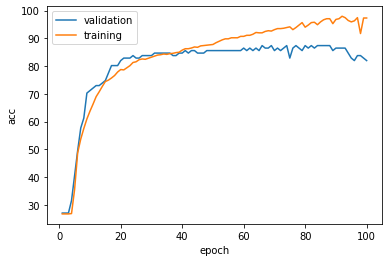

In [ ]:
# TODO: Implement your plots here, you can use matplotlib library to do so.
# TODO: Implement your plots here, you can use matplotlib library to do so.
print("Batch_size:",optimalBatch, ", Learning rate:",optimalLearn)
print("Validation and training accuracies with optimal hyperparameters")

plt.xlabel("epoch")
plt.ylabel("acc")

plt.plot(epoch_list_cnn,accuracy_list_val_cnn,label="validation")

plt.plot(epoch_list_cnn,accuracy_list_train_cnn, label = "training")

plt.legend()

plt.show()

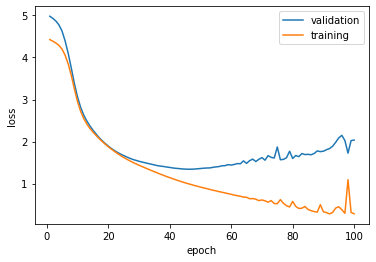

In [ ]:
plt.xlabel("epoch")
plt.ylabel("loss")

plt.plot(epoch_list_cnn,loss_val_cnn,label="validation")

plt.plot(epoch_list_cnn,loss_train_cnn, label = "training")

plt.legend()

plt.show()

### Test [4 points]
Concluding your analysis, report the confusion matrix for the best model you obtained during your CNN model training. Then using this confusion matrix, report accuracy, recall, precision, and $F_1$ score for your best model. Use macro averaging in all of your metrics.

Accuracy: 0.846
Precision: 0.845
Recall: 0.848
F1 Score: 0.834


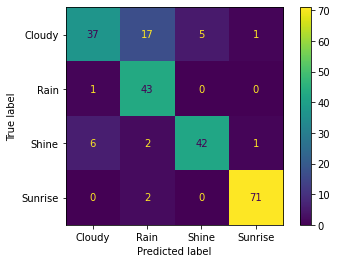

In [ ]:
# TODO: Implement your evaluation script here, provide the confusion matrix and the requested metrics
# best model ve scorelar

# TODO: Implement your evaluation script here, provide the confusion matrix and the requested metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_true_cnn = []
y_pred_cnn = []
for images, labels in test_loader:

    images = images.to(device)
    outputs = modelCnn(images)
    y_true_cnn.extend(labels)
    _, predicted = torch.max(outputs.data, 1)
    y_pred_cnn.extend(predicted)


accuracy = accuracy_score(y_true_cnn, y_pred_cnn)
precision = precision_score(y_true_cnn, y_pred_cnn,average='macro')
recall = recall_score(y_true_cnn, y_pred_cnn,average='macro')
f1 = f1_score(y_true_cnn, y_pred_cnn,average='macro')

print(f'Accuracy: {accuracy:.3f}')
print(f'Precision: {precision:.3f}')
print(f'Recall: {recall:.3f}')
print(f'F1 Score: {f1:.3f}')

conf_m =confusion_matrix(y_true_cnn, y_pred_cnn)

conf_graph = ConfusionMatrixDisplay(confusion_matrix= conf_m, display_labels=classes)

conf_graph.plot()
plt.show()

### Discussion [3 points]
Now, try to compare the two models that you trained. How different are these two models regarding the number of parameters used?

Explain your findings by connecting them with your experimental results. You can include your comments on a separate Markdown cell or below the question statement.

#**Discussion**

FCN model has the Accuracy: 0.860, Precision: 0.849, Recall: 0.848, F1 Score: 0.848 and for CNN Model it has Accuracy: 0.846, Precision: 0.845, Recall: 0.848, F1 Score: 0.834 in the same test sets. As we can see numbers are very close to each other. However, I had expected CNN model to work better as it is very good for image classification. The reason behind that can be images was not complicated and did not have much positional characteristics that CNN model can understand better than FCN model. Anohter reason may be the test set we selected even if we randomly distributed sets at the end it is possible that test set can fit with one of the models with better. In training and validation parts, accuracy of the best CNN model was better than best FCN model in general. However in test set FCN model has slightly better accuracy rate.

If we look at parameters; when we look at epoch number we can see that in both models it should be bigger than a number for accuracy and loss to converges their final values. We can see in plots when epoch is bigger than 40 accuracy and loss values of validation are very close to their values in the 100th epoch. Training accuracy gets smaller in every epoch as our models' aim in each batch to is decreasing loss of that batches. Although it is not always the case, training accuracy also increases in each epoch with updated parameters. Validation accuracy and losses do not behave same with test accuracy and losses. Validation accuracies do not go high as test accuracies and validation losses do not go down as training losses. When we look at the affect of learning rate by looking prints we can see if learning rate is bigger than it starts with a higher accuracy and lower loss and it reaches to the relatives of the final value much faster. When we compare FCN and CNN we can say that CNN is more complex model and even with the same hyperparameters reaching the optimal CNN model ( highest accuracy ) takes more epochs than FCN model as we can see in the prints. For batch size, in each models 128 batch_size was worst results with accuracy so I can say increasing the batch_size too much is not a good idea.



## Transfer Learning [22 points]

As the last part of this assignment, you will practice transfer learning. In this methodology, we aim to use models trained on large-scale datasets for our task. As we do not have access to large datasets and computational resources all the time, we sometimes try to use already trained models (on other datasets) as a good starting point for our model, and then fine-tune the weights considering our task.  

Torchvision library provides numerous models pretrained for specific tasks. [Here](https://pytorch.org/vision/stable/models.html), you can find a list of pretrained models. For this part, you will include [ResNet](https://arxiv.org/abs/1512.03385)-18 model, pretrained with ImageNet dataset. ImageNet is a large dataset where training from scratch would take a long time. You will fine-tune this pretrained module for your task. 
<br>
**Hint:** You can add a Linear layer to adapt the model to the number of classes needed for your task. You can access the number of inputs to the ResNet-18 model as $\texttt{model.fc.in_features}$ and then modify the fully connected layer of the model $\texttt{model.fc}$.
<br>

Using the ResNet-18 backbone, implement this model's training loop (by adapting it to your task). You can implement the training procedure in the cell provided below. Again save your model based on a criterion indicating the best model. Explain the reasoning for your criteria. Use the SGD optimizer provided by PyTorch to optimize your model.

Just like the previous parts, you can also tune your hyperparameters to optimize your model's performance. 

🛑 I tried 4 different situations and at the end selected my hyperparameters according to the accuracy at the end of 100th epochs. So my criterion was getting the hyperparameters with the best validation accuracy at the end of trainings. It came out optimal learn rate is 0.05 and batch size is 64 for Transfer Learning model.


###Training [12 points]

In [ ]:
#HINT: note that your training time should not take many days.


import torch
from torchvision import models


modelTL = models.resnet18(pretrained=True)

for param in modelTL.parameters():
    param.requires_grad = False


num_ftrs = modelTL.fc.in_features
modelTL.fc = torch.nn.Linear(num_ftrs, 4)


#TODO:
#Pick your hyper parameters
max_epoch = 30 #100
train_batch = 64
test_batch = 64
learning_rate = (5e-2,5e-3)
momentum = 0.5
weight_decay = 5e-04

optimalLearn = -1
maxAcc = -1

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=train_batch,
                                          shuffle=False)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=test_batch,
                                         shuffle=False)

val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=train_batch,
                                         shuffle=False)

input_size = 3*224*224
output_size = 4

res = models.resnet18(pretrained=True)
# TODO: training loop + eval
"""
iter = 0
accuracy_list_val = []
accuracy_list_train = []

loss_val =[]
loss_train = []
epoch_list = []
"""
criterion = nn.CrossEntropyLoss()

for lrate in learning_rate:
  print("LR",lrate)
  # Load the pre-trained ResNet-18 model
  modelTL = res

  # Freeze the model weights
  for param in modelTL.parameters():
    param.requires_grad = False

  # Replace the final fully-connected layer with a new one
  num_ftrs = modelTL.fc.in_features
  modelTL.fc = torch.nn.Linear(num_ftrs, 4)
  modelTL = modelTL.to(device)
  
  optimizer = torch.optim.SGD(modelTL.parameters(), lr = lrate)
  for i in range (0,max_epoch):
    correct = 0
    total = 0
    loss_t = 0
    for j,(images, labels) in enumerate(train_loader):

      images = images.to(device)
      labels = labels.to(device)

      outputs = modelTL(images)
      loss = criterion(outputs, labels.long())

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      loss_t = loss_t + criterion(outputs, labels.long())
      _, predicted = torch.max(outputs.data, 1)

      total += labels.size(0)

      if torch.cuda.is_available():
          correct += (predicted.cpu() == labels.cpu()).sum()
      else:
          correct += (predicted == labels).sum()
        
      accuracy = 100 * correct.item() / total
      
      if j == len(train_loader) - 1:
        """
        accuracy_list_train.append(correct*100/total)
        loss_train.append(loss_t.item())
        """
        loss_t = 100 * loss_t / total
        if (i+1) % 5 == 0:
          print('Epoch:(Training) {}. Loss: {}. Accuracy: {}'.format(i+1, loss_t, accuracy))

        correctV = 0
        totalV = 0
        loss_v =0
        for images, labels in val_loader:

            #images = images.view(-1, 3,224,224).to(device)
            images = images.to(device)

            outputs = modelTL(images)

            loss_v = loss_v + criterion(outputs, labels.long())

            _, predicted = torch.max(outputs.data, 1)

                # Total number of labels
            totalV += labels.size(0)

            if torch.cuda.is_available():
                correctV += (predicted.cpu() == labels.cpu()).sum()
            else:
                correctV += (predicted == labels).sum()

        accuracyV = 100 * correctV.item() / totalV
        loss_v = 100 * loss_v / totalV
        if (i+1) % 5 == 0:
          print('Epoch:(Validation)  {}. Loss: {}. Accuracy: {}'.format(i+1, loss_v, accuracyV))
        """
        accuracy_list_val.append(correctV*100/totalV)
        loss_val.append(loss_v.item())
        epoch_list.append(i+1)
        """
        if (i+1) == max_epoch:
          if ( accuracyV > maxAcc):
            maxAcc = accuracyV
            optimalLearn = lrate

print("optimal learning parameter",optimalLearn)


optimalBatch = -1
maxAcc = -1


batchSizes = ( 32,64)
criterion = nn.CrossEntropyLoss()


for batchS in batchSizes:
  print("Batch Size",batchS)
  
  modelTL = res

  # Freeze the model weights
  for param in modelTL.parameters():
    param.requires_grad = False

  # Replace the final fully-connected layer with a new one
  num_ftrs = modelTL.fc.in_features
  modelTL.fc = torch.nn.Linear(num_ftrs, 4)
  modelTL = modelTL.to(device)
  optimizer = torch.optim.SGD(modelTL.parameters(), lr = optimalLearn)

  train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batchS,
                                          shuffle=False)

  val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batchS,
                                         shuffle=False)
  for i in range (0,max_epoch):
    correct = 0
    total = 0
    loss_t = 0
    for j,(images, labels) in enumerate(train_loader):

    
      images = images.to(device)
      labels = labels.to(device)

      outputs = modelTL(images)
      loss = criterion(outputs, labels.long())

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      loss_t = loss_t + criterion(outputs, labels.long())
      _, predicted = torch.max(outputs.data, 1)

      total += labels.size(0)

      if torch.cuda.is_available():
          correct += (predicted.cpu() == labels.cpu()).sum()
      else:
          correct += (predicted == labels).sum()
        
      #accuracy = 100 * correct.item() / total
      #loss_t = 100 * loss_t / total
      if j == len(train_loader) - 1:
        """
        accuracy_list_train.append(correct*100/total)
        loss_train.append(loss_t.item())
        """
        accuracy = 100 * correct.item() / total
        loss_t = 100 * loss_t / total
        if (i+1) % 5 == 0:
          print('Epoch:(Training) {}. Loss: {}. Accuracy: {}'.format(i+1, loss_t, accuracy))

        correctV = 0
        totalV = 0
        loss_v =0
        for images, labels in val_loader:

            images = images.to(device)

            outputs = modelTL(images)

            loss_v = loss_v + criterion(outputs, labels.long())

            _, predicted = torch.max(outputs.data, 1)

            totalV += labels.size(0)

            if torch.cuda.is_available():
                correctV += (predicted.cpu() == labels.cpu()).sum()
            else:
                correctV += (predicted == labels).sum()

        accuracyV = 100 * correctV.item() / totalV
        loss_v = 100 * loss_v / totalV
            # Print Loss
        if (i+1) % 5 == 0:
          print('Epoch:(Validation) {}. Loss: {}. Accuracy: {}'.format(i+1, loss_v, accuracyV))
        """
        accuracy_list_val.append(correctV*100/totalV)
        loss_val.append(loss_v.item())
        epoch_list.append(i+1)
        """
        if (i+1) == max_epoch:
          if ( accuracyV > maxAcc):
            maxAcc = accuracyV
            optimalBatch = batchS

print("optimal batch size ",optimalBatch)


LR 0.05
Epoch:(Training) 5. Loss: 0.2939363420009613. Accuracy: 94.65648854961832
Epoch:(Validation)  5. Loss: 0.29650625586509705. Accuracy: 93.69369369369369
Epoch:(Training) 10. Loss: 0.16760662198066711. Accuracy: 97.45547073791349
Epoch:(Validation)  10. Loss: 0.26740437746047974. Accuracy: 95.49549549549549
Epoch:(Training) 15. Loss: 0.12005634605884552. Accuracy: 98.72773536895674
Epoch:(Validation)  15. Loss: 0.2647230923175812. Accuracy: 96.3963963963964
Epoch:(Training) 20. Loss: 0.09354132413864136. Accuracy: 99.10941475826972
Epoch:(Validation)  20. Loss: 0.26425349712371826. Accuracy: 96.3963963963964
Epoch:(Training) 25. Loss: 0.07674871385097504. Accuracy: 99.4910941475827
Epoch:(Validation)  25. Loss: 0.2640952467918396. Accuracy: 96.3963963963964
Epoch:(Training) 30. Loss: 0.06515011936426163. Accuracy: 99.74554707379134
Epoch:(Validation)  30. Loss: 0.2645903527736664. Accuracy: 96.3963963963964
LR 0.005
Epoch:(Training) 5. Loss: 1.0310057401657104. Accuracy: 89.05852

In [ ]:
##Drawing plots with the best hyperparameters on training and validation sets and training the model with tl last time
accuracy_list_val_tl = []
accuracy_list_train_tl = []

loss_val_tl =[]
loss_train_tl = []
epoch_list_tl = []

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=optimalBatch,
                                          shuffle=False)

val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=optimalBatch,
                                         shuffle=False)

modelTL = models.resnet18(pretrained=True)

for param in modelTL.parameters():
    param.requires_grad = False

num_ftrs = modelTL.fc.in_features
modelTL.fc = torch.nn.Linear(num_ftrs, 4)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(modelTL.parameters(), lr = optimalLearn)

for i in range (0,max_epoch):
    correct = 0
    total = 0
    loss_t = 0
    for j,(images, labels) in enumerate(train_loader):

    
      images = images.to(device)
      labels = labels.to(device)

      outputs = modelTL(images)
      loss = criterion(outputs, labels.long())

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      loss_t = loss_t + criterion(outputs, labels.long())
      _, predicted = torch.max(outputs.data, 1)

      total += labels.size(0)

      if torch.cuda.is_available():
          correct += (predicted.cpu() == labels.cpu()).sum()
      else:
          correct += (predicted == labels).sum()
        
      
      if j == len(train_loader) - 1:
        accuracy = 100 * correct.item() / total
        loss_t = 100 * loss_t / total
        accuracy_list_train_tl.append(correct*100/total)
        loss_train_tl.append(loss_t.item())
        if (i+1) % 5 == 0:
          print('Epoch: Training {}. Loss: {}. Accuracy: {}'.format(i+1, loss_t, accuracy))

        correctV = 0
        totalV = 0
        loss_v =0
        for images, labels in val_loader:

            images = images.to(device)

            outputs = modelTL(images)

            loss_v = loss_v + criterion(outputs, labels.long())

            _, predicted = torch.max(outputs.data, 1)

                # Total number of labels
            totalV += labels.size(0)

            if torch.cuda.is_available():
                correctV += (predicted.cpu() == labels.cpu()).sum()
            else:
                correctV += (predicted == labels).sum()

        accuracyV = 100 * correctV.item() / totalV
        loss_v = 100 * loss_v / totalV
        if (i+1) % 5 == 0:
          print('Epoch: Validation {}. Loss: {}. Accuracy: {}'.format(i+1, loss_v, accuracyV))
        accuracy_list_val_tl.append(correctV*100/totalV)
        loss_val_tl.append(loss_v.item())
        epoch_list_tl.append(i+1)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch: Training 5. Loss: 0.2893437147140503. Accuracy: 94.91094147582697
Epoch: Validation 5. Loss: 0.286583811044693. Accuracy: 95.49549549549549
Epoch: Training 10. Loss: 0.16981031000614166. Accuracy: 97.70992366412214
Epoch: Validation 10. Loss: 0.23692019283771515. Accuracy: 95.49549549549549
Epoch: Training 15. Loss: 0.12280873209238052. Accuracy: 98.47328244274809
Epoch: Validation 15. Loss: 0.22922593355178833. Accuracy: 95.49549549549549
Epoch: Training 20. Loss: 0.09575213491916656. Accuracy: 98.9821882951654
Epoch: Validation 20. Loss: 0.22851033508777618. Accuracy: 95.49549549549549
Epoch: Training 25. Loss: 0.07841994613409042. Accuracy: 99.4910941475827
Epoch: Validation 25. Loss: 0.22885340452194214. Accuracy: 95.49549549549549
Epoch: Training 30. Loss: 0.06645388156175613. Accuracy: 99.61832061068702
Epoch: Validation 30. Loss: 0.22976984083652496. Accuracy: 95.49549549549549


###Learning Process Analysis [3 points]
After training your model, provide two plots summarizing the learning procedure. Like previous parts, you will provide plots for loss value and accuracy progression over epochs. Remember that for each plot, you need to include two curves (one for the training set and one for the validation set).

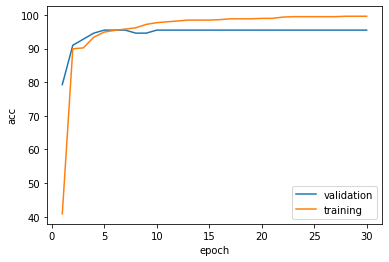

In [ ]:
# TODO: Implement your plots here, you can use matplotlib library to do so.
plt.xlabel("epoch")
plt.ylabel("acc")

plt.plot(epoch_list_tl,accuracy_list_val_tl,label="validation")

plt.plot(epoch_list_tl,accuracy_list_train_tl, label = "training")

plt.legend()

plt.show()

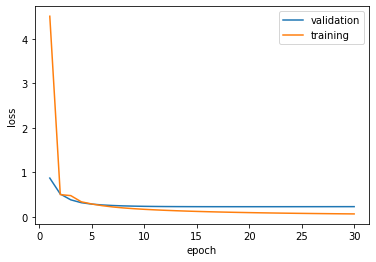

In [ ]:
plt.xlabel("epoch")
plt.ylabel("loss")

plt.plot(epoch_list_tl,loss_val_tl,label="validation")

plt.plot(epoch_list_tl,loss_train_tl, label = "training")

#plt.plot(epoch3,acc3, label = "mini batch ( 64 )")

plt.legend()

plt.show()

### Test [4 points]
Following your analysis, report the confusion matrix for the best model you obtained (with the criteria you defined). Then, report the accuracy, precision, recall and $F_1$ score for the best model. In all of the metrics, use macro averaging.

Accuracy: 0.939
Precision: 0.938
Recall: 0.938
F1 Score: 0.938


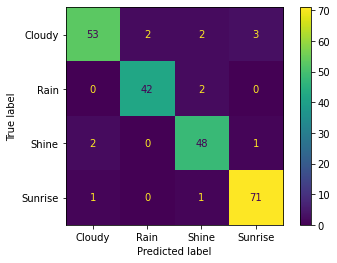

In [ ]:
# TODO: Implement your evaluation script here, provide the confusion matrix and the requested metrics
# TODO: Implement your evaluation script here, provide the confusion matrix and the requested metrics
# best model ve scorelar

# TODO: Implement your evaluation script here, provide the confusion matrix and the requested metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_true = []
y_pred = []
for images, labels in test_loader:

    images = images.to(device)
    outputs = modelTL(images)
    y_true.extend(labels)
    _, predicted = torch.max(outputs.data, 1)
    y_pred.extend(predicted)


accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred,average='macro')
recall = recall_score(y_true, y_pred,average='macro')
f1 = f1_score(y_true, y_pred,average='macro')

print(f'Accuracy: {accuracy:.3f}')
print(f'Precision: {precision:.3f}')
print(f'Recall: {recall:.3f}')
print(f'F1 Score: {f1:.3f}')

conf_m =confusion_matrix(y_true, y_pred)

conf_graph = ConfusionMatrixDisplay(confusion_matrix= conf_m, display_labels=classes)

conf_graph.plot()
plt.show()

### Discussion [3 points]
Now discuss the effectiveness of Transfer Learning. How does it improve performance?  

By using transfer learning our model gets Accuracy: 0.939, Precision: 0.938, Recall: 0.938, F1 Score: 0.938. Those rates are higher than the rates of first 2 models. With transfer learning our models' accuracy increases directly in first few epoches and loss decreases to small values in first few epoches. We can see that Resnet-18 is an appropriate pretrained model for our classification task as it increases accuracy. It can be said that Resnet-18 had already learned useful features that can be useful for our task. In addition, if the pretrained model was too complex for our classification then we could have seen overfitting and accuracy rate would not be high. 

# References
[1] Ajayi, Gbeminiyi (2018), “Multi-class Weather Dataset for Image Classification”, Mendeley Data, V1, doi: 10.17632/4drtyfjtfy.1